**Perkenalan**

Nama : Iqbal Janitra

Batch : 003

Pertama kita mengimport numpy, panda terlebih dahulu

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Memasukan Data
Kemudian kita masukan data yang diperoleh dari BigQuery data yang kita butuhkan untuk menganalisis sebuah data adalah nama negara, tanggal, jumlah kasus, meninggal, sembuh untuk menganalisis presentase kemungkinan meninggal dan sembuh

Pertama kita input data yang kita inginkan dari sebuah data bigquery-public-data.covid19_jhu_csse_eu di summary folder
    
SELECT country_region, date, confirmed, deaths, recovered, active, admin2 FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` WHERE country_region LIKE '%Liberia'

Selanjutnya kita import data yang kita peroleh dari BigQuery menjadi file.csv



In [18]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/GCpase0/GC1PASE0/bquxjob_204b13b0_184d1ad6a5a.csv")

selanjutnya kita mencari sebuah ukuran dari kolom data 

In [19]:
df.shape

(991, 7)

melihat tampilan head atau bagian atas 10 baris

In [20]:
df.head(10)

,country_region,date,confirmed,deaths,recovered,active,admin2
0,Liberia,2020-05-30,280,27,148.0,105.0,NaN
1,Liberia,2021-08-14,5459,148,NaN,NaN,NaN
2,Liberia,2021-04-06,2042,85,1899.0,58.0,NaN
3,Liberia,2020-04-30,141,16,45.0,80.0,NaN
4,Liberia,2021-04-23,2097,85,1940.0,72.0,NaN
5,Liberia,2021-09-24,5915,283,NaN,NaN,NaN
6,Liberia,2021-01-24,1914,84,1714.0,116.0,NaN
7,Liberia,2022-10-08,7974,294,NaN,NaN,NaN
8,Liberia,2022-05-04,7434,294,NaN,NaN,NaN
9,Liberia,2022-01-21,7208,288,NaN,NaN,NaN


disini kita akan mencari jenis value data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_region  991 non-null    object 
 1   date            991 non-null    object 
 2   confirmed       991 non-null    int64  
 3   deaths          991 non-null    int64  
 4   recovered       507 non-null    float64
 5   active          501 non-null    float64
 6   admin2          0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 54.3+ KB


terlihat masih ada beberapa data type yang tidak seusai yang harus kita ubah

In [22]:
df.nunique()

country_region      1
date              991
confirmed         351
deaths             76
recovered         197
active            184
admin2              0
dtype: int64

kemudian kita ubah data type pada 'date' menjadi datetime

In [23]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_region  991 non-null    object        
 1   date            991 non-null    datetime64[ns]
 2   confirmed       991 non-null    int64         
 3   deaths          991 non-null    int64         
 4   recovered       507 non-null    float64       
 5   active          501 non-null    float64       
 6   admin2          0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 54.3+ KB


In [ ]:
convert= {'deaths':int, 'recovered':int, 'active':int}
df=df.astype(convert)
print(df.dtypes)
df.head(50)

merubah nama table 'country_region menjadi country

In [24]:
df.rename(columns = {'country_region':'country'},inplace=True)
df

,country,date,confirmed,deaths,recovered,active,admin2
0,Liberia,2020-05-30,280,27,148.0,105.0,NaN
1,Liberia,2021-08-14,5459,148,NaN,NaN,NaN
2,Liberia,2021-04-06,2042,85,1899.0,58.0,NaN
3,Liberia,2020-04-30,141,16,45.0,80.0,NaN
4,Liberia,2021-04-23,2097,85,1940.0,72.0,NaN
...,...,...,...,...,...,...,...
986,Liberia,2022-03-28,7400,294,NaN,NaN,NaN
987,Liberia,2021-08-13,5459,148,NaN,NaN,NaN
988,Liberia,2021-11-30,5824,287,NaN,NaN,NaN
989,Liberia,2020-06-08,370,30,195.0,145.0,NaN


langkah berikutnya kita akan menghapus data yang tidak akan terpakai seperti 'admin2' kita akan menghapusnya menggunakan .drop

In [25]:
df.drop(columns ='admin2', inplace= True)
df

,country,date,confirmed,deaths,recovered,active
0,Liberia,2020-05-30,280,27,148.0,105.0
1,Liberia,2021-08-14,5459,148,NaN,NaN
2,Liberia,2021-04-06,2042,85,1899.0,58.0
3,Liberia,2020-04-30,141,16,45.0,80.0
4,Liberia,2021-04-23,2097,85,1940.0,72.0
...,...,...,...,...,...,...
986,Liberia,2022-03-28,7400,294,NaN,NaN
987,Liberia,2021-08-13,5459,148,NaN,NaN
988,Liberia,2021-11-30,5824,287,NaN,NaN
989,Liberia,2020-06-08,370,30,195.0,145.0


dan selanjutnya menggunakan .fillna untuk mengganti data NaN ya tidak terisi menjadi '0'

In [26]:
df['recovered'].fillna(value='0',inplace=True)
df['active'].fillna(value='0',inplace=True)
df


,country,date,confirmed,deaths,recovered,active
0,Liberia,2020-05-30,280,27,148.0,105.0
1,Liberia,2021-08-14,5459,148,0,0
2,Liberia,2021-04-06,2042,85,1899.0,58.0
3,Liberia,2020-04-30,141,16,45.0,80.0
4,Liberia,2021-04-23,2097,85,1940.0,72.0
...,...,...,...,...,...,...
986,Liberia,2022-03-28,7400,294,0,0
987,Liberia,2021-08-13,5459,148,0,0
988,Liberia,2021-11-30,5824,287,0,0
989,Liberia,2020-06-08,370,30,195.0,145.0


selanjutnya kita merubah data 'death' 'recovered' 'active' menjadi integer

In [27]:
convert= {'deaths':int, 'recovered':int, 'active':int}
df=df.astype(convert)
print(df.dtypes)
df.head(50)

country              object
date         datetime64[ns]
confirmed             int64
deaths                int64
recovered             int64
active                int64
dtype: object


,country,date,confirmed,deaths,recovered,active
0,Liberia,2020-05-30,280,27,148,105
1,Liberia,2021-08-14,5459,148,0,0
2,Liberia,2021-04-06,2042,85,1899,58
3,Liberia,2020-04-30,141,16,45,80
4,Liberia,2021-04-23,2097,85,1940,72
5,Liberia,2021-09-24,5915,283,0,0
6,Liberia,2021-01-24,1914,84,1714,116
7,Liberia,2022-10-08,7974,294,0,0
8,Liberia,2022-05-04,7434,294,0,0
9,Liberia,2022-01-21,7208,288,0,0


melihat total kasus di negara liberia

In [30]:
df.groupby('active').count()/df['deaths'].count()

,country,date,confirmed,deaths,recovered
active,,,,,
0,0.494450,0.494450,0.494450,0.494450,0.494450
3,0.010091,0.010091,0.010091,0.010091,0.010091
6,0.003027,0.003027,0.003027,0.003027,0.003027
7,0.002018,0.002018,0.002018,0.002018,0.002018
8,0.002018,0.002018,0.002018,0.002018,0.002018
...,...,...,...,...,...
2465,0.002018,0.002018,0.002018,0.002018,0.002018
2506,0.002018,0.002018,0.002018,0.002018,0.002018
2510,0.001009,0.001009,0.001009,0.001009,0.001009


**EKPLORASI**

Disini kita akan mengesklor data covid di negara Lebira disini kita akan mencari data ratio kematian dan sembuh dari covid


In [31]:
df ['deaths ratio'] = df['active']/df['deaths'].count()*100
df ['recovered ratio'] = df['confirmed']/df['recovered'].count()*100
convert= {'recovered ratio':int, 'deaths ratio':int}
df=df.astype(convert)
#merubah data tipe menjadi integer
df.sample(5)


,country,date,confirmed,deaths,recovered,active,deaths ratio,recovered ratio
178,Liberia,2022-08-22,7656,294,0,0,0,772
819,Liberia,2020-08-10,1240,79,725,436,43,125
742,Liberia,2020-12-23,1779,83,1406,290,29,179
220,Liberia,2021-02-03,1945,84,1766,95,9,196
923,Liberia,2021-08-11,5459,148,0,0,0,550


mengsorting tanggal agar sesuai

In [ ]:
df.sort_values(by='date', inplace=True, ascending=True)
df.head(50)

,country,date,confirmed,deaths,recovered,active,deaths ratio,recovered ratio
784,Liberia,2020-03-16,1,0,0,0,0,0
940,Liberia,2020-03-17,1,0,0,0,0,0
135,Liberia,2020-03-18,2,0,0,0,0,0
20,Liberia,2020-03-19,2,0,0,0,0,0
193,Liberia,2020-03-20,2,0,0,0,0,0
863,Liberia,2020-03-21,3,0,0,0,0,0
233,Liberia,2020-03-22,3,0,0,3,0,0
498,Liberia,2020-03-23,3,0,0,3,0,0
179,Liberia,2020-03-24,3,0,0,3,0,0
975,Liberia,2020-03-25,3,0,0,3,0,0


In [32]:
first_cases=np.where((df['confirmed']>0) & (df['confirmed']<3))
print('first cases = \n',df.loc[first_cases])

first cases = 
      country       date  confirmed  deaths  recovered  active  deaths ratio  \
20   Liberia 2020-03-19          2       0          0       0             0   
135  Liberia 2020-03-18          2       0          0       0             0   
193  Liberia 2020-03-20          2       0          0       0             0   
784  Liberia 2020-03-16          1       0          0       0             0   
940  Liberia 2020-03-17          1       0          0       0             0   

     recovered ratio  
20                 0  
135                0  
193                0  
784                0  
940                0  


In [ ]:
df.reset_index(inplace=True, drop=True)
df.head()

,country,date,confirmed,deaths,recovered,active,deaths ratio,recovered ratio
0,Liberia,2020-03-16,1,0,0,0,0,0
1,Liberia,2020-03-17,1,0,0,0,0,0
2,Liberia,2020-03-18,2,0,0,0,0,0
3,Liberia,2020-03-19,2,0,0,0,0,0
4,Liberia,2020-03-20,2,0,0,0,0,0


In [ ]:
df.describe()

,confirmed,deaths,recovered,active,deaths ratio,recovered ratio
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,4278.094854,175.859738,647.703330,170.117053,16.901110,431.202825
std,2874.552030,110.131352,848.436873,465.528441,46.879906,290.041937
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1533.500000,82.000000,0.000000,0.000000,0.000000,154.500000
50%,5396.000000,148.000000,0.000000,3.000000,0.000000,544.000000
75%,7400.000000,294.000000,1343.000000,100.000000,10.000000,746.000000
max,8022.000000,294.000000,2715.000000,2596.000000,261.000000,809.000000


In [ ]:
print('total confirmed',df.confirmed.sum())
print ('total deaths',df.deaths.sum())
print ('total active',df.active.sum())
print ('total recovered',df.recovered.sum())


Melihat jumlah ratio deaths dan recovered

In [ ]:
df

,country,date,confirmed,deaths,recovered,active,deaths ratio,recovered ratio
0,Liberia,2020-03-16,1,0,0,0,0,0
1,Liberia,2020-03-17,1,0,0,0,0,0
2,Liberia,2020-03-18,2,0,0,0,0,0
3,Liberia,2020-03-19,2,0,0,0,0,0
4,Liberia,2020-03-20,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
986,Liberia,2022-11-27,8014,294,0,0,0,808
987,Liberia,2022-11-28,8014,294,0,0,0,808
988,Liberia,2022-11-29,8022,294,0,0,0,809
989,Liberia,2022-11-30,8022,294,0,0,0,809


/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_804/2651698810.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['date'] >= '2020-03-16') & (df['date'] <= '2022-12-01')].groupby('date')['recovered ratio','deaths ratio'


array([<AxesSubplot: >], dtype=object)

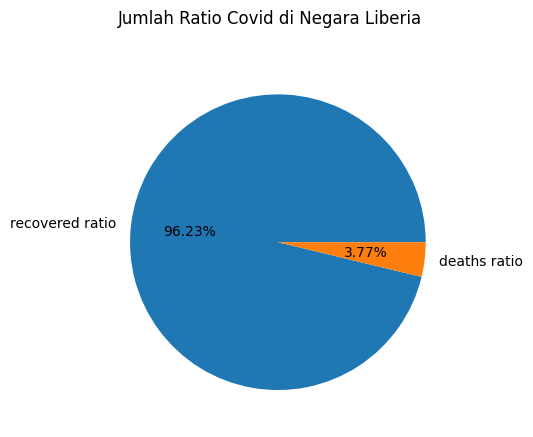

In [ ]:
df[(df['date'] >= '2020-03-16') & (df['date'] <= '2022-12-01')].groupby('date')['recovered ratio','deaths ratio'
].sum().mean().plot(kind='pie',autopct='%.2f%%' ,title='Jumlah Ratio Covid di Negara Liberia',subplots=True)

disini kita sudah mendapatkan ratio kematian dan sembuh dari covid, seperti yang kita lihat kasus kemungkinan kematian sangatlah rendah yang berarti cukup baik untuk negara Liberia

/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_804/1345599503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('date')['deaths','recovered','confirmed'].sum().plot()


<AxesSubplot: xlabel='date'>

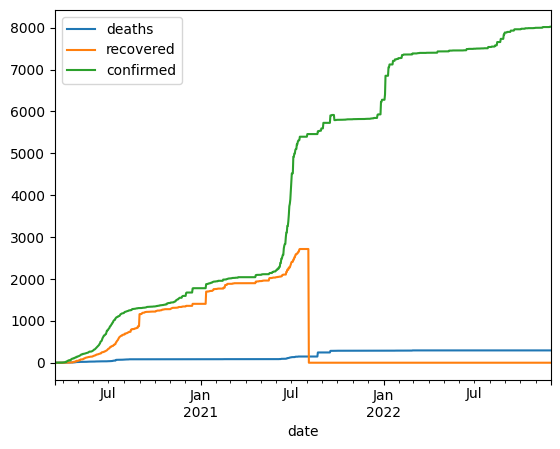

In [ ]:
df.groupby('date')['deaths','recovered','confirmed'].sum().plot()

/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_1691/4151700703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['date'] < '2021-8-5')


<AxesSubplot: xlabel='date'>

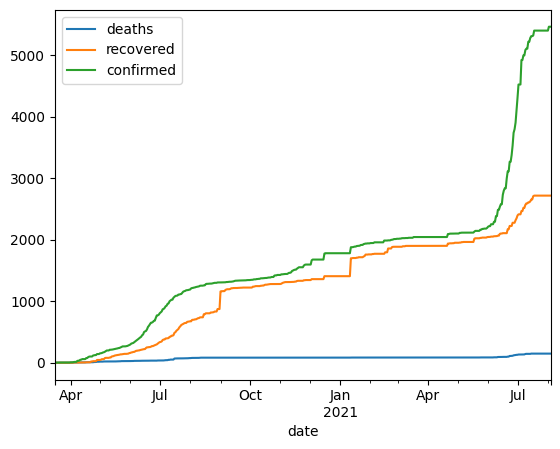

In [ ]:
df[(df['date'] < '2021-8-5')
].groupby('date')['deaths','recovered','confirmed'].sum().plot()

/var/folders/9y/396q6bm952zdggwx5bsp21v80000gp/T/ipykernel_1691/2119815743.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df['date'] < '2021-8-5')


<AxesSubplot: xlabel='date'>

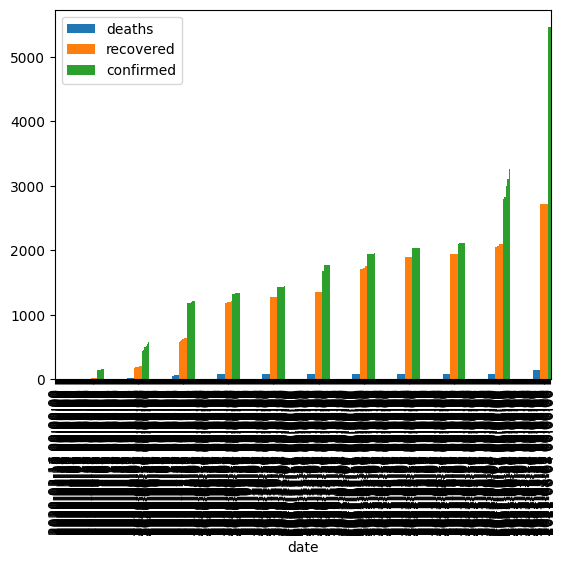

In [ ]:
df[(df['date'] < '2021-8-5')
].groupby('date')['deaths','recovered','confirmed'].sum().plot(kind='bar')

***KESIMPULAN***

**Maret**

terjadi kasus pertama pada bulan 2020-03-16 sebanyak 1 kasus covid yang terjadi dan kasus lainya 20-04-04 sebanyak sepuluh kasus dan terjadi kematian pertama pada kasus covid di negara lebiria.

**April**

Angka status covid terus menaik hingga menyentuh 100 kasus covid pada tanggal 20-04-21 angkan tetapi banyak juga yang sudah terecovery sebanyak 20 orang

**Tahun 2021**

Di tahun 2021 angka covid terus bertambah dari bulan ke bulan, hingga menyentuh angka 1700 kasus lebih dan akan terus bertambah di setiap tahunya

Dari data yang kita peroleh kesuluruhanya adalah kita tahu bahwa negara liberia memiliki angka kematian yang rendah, dari setiap kasusnya hanya memiliki kemungkinan meninggal 3,77% dan juga memeliki kesempatan sembuh jauh lebih tinggi yang memiliki nilai 96%.
akan tetapi status covid selalu terus bertambah di setiap bulanya.